### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda

# df = ['tienda','tienda2','tienda3','tienda4']

# for a in df:

#     df = globals()[a]
#     print(f"Name: {a},columns:{list(df.columns)}")  






#1. Ingreso total por cada tienda

In [2]:
nombre = ['tienda','tienda2','tienda3','tienda4']
for df in nombre:
    df_ba = globals()[df]
    total = df_ba['Precio'].sum()
    print(f"El Ingresod total para {df}: es {total}")

El Ingresod total para tienda: es 1150880400.0
El Ingresod total para tienda2: es 1116343500.0
El Ingresod total para tienda3: es 1098019600.0
El Ingresod total para tienda4: es 1038375700.0


# 2. Ventas por categoría

df_tienda   Categoría del Producto  Cantidad Vendida
0                Muebles               465
1           Electrónicos               448
2               Juguetes               324
3      Electrodomésticos               312
4   Deportes y diversión               284
--------------------------------------------------


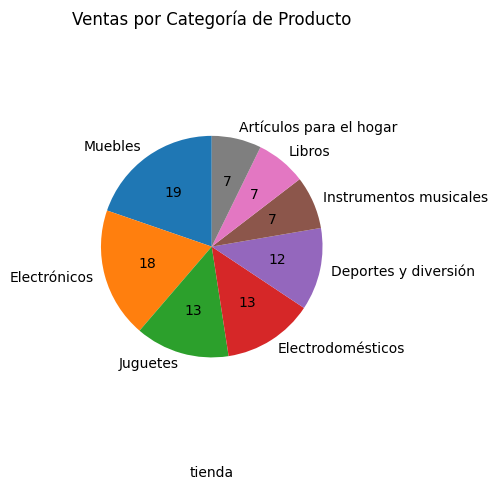

df_tienda2   Categoría del Producto  Cantidad Vendida
0                Muebles               442
1           Electrónicos               422
2               Juguetes               313
3      Electrodomésticos               305
4   Deportes y diversión               275
--------------------------------------------------


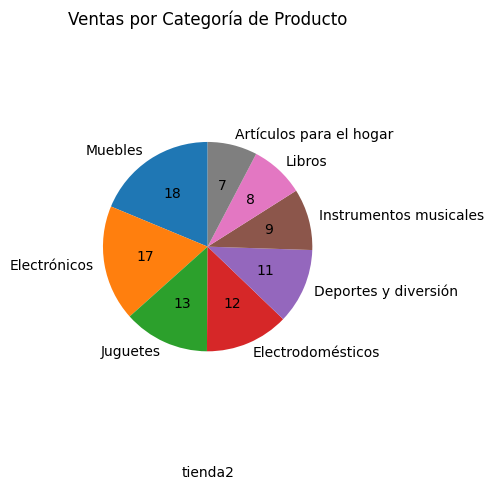

df_tienda3   Categoría del Producto  Cantidad Vendida
0                Muebles               499
1           Electrónicos               451
2               Juguetes               315
3      Electrodomésticos               278
4   Deportes y diversión               277
--------------------------------------------------


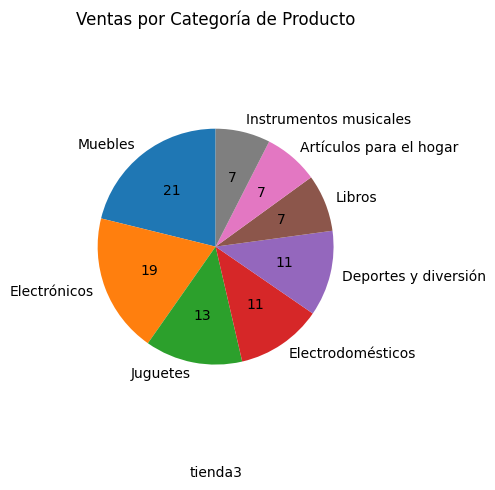

df_tienda4   Categoría del Producto  Cantidad Vendida
0                Muebles               480
1           Electrónicos               451
2               Juguetes               338
3   Deportes y diversión               277
4      Electrodomésticos               254
--------------------------------------------------


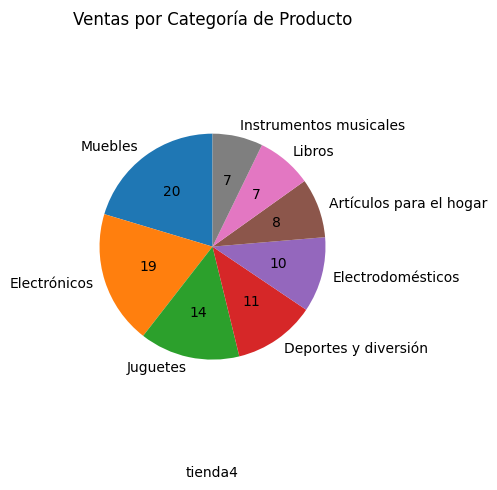

In [31]:
import matplotlib.pyplot as plt
nombre = ['tienda','tienda2','tienda3','tienda4']
for category in nombre:
    df_tienda = globals()[category]
    df = df_tienda.groupby(['Categoría del Producto'])['Producto'].count().sort_values(ascending=False).reset_index()
    df.rename(columns={'Producto':'Cantidad Vendida'},inplace=True)
    print(f'df_{category}',df.head())
    print(f"-----"*10)
    

    # Gráfico de pastel
    plt.figure(figsize=(5, 5))
    plt.pie(
        df['Cantidad Vendida'],
        labels=df['Categoría del Producto'],
        autopct='%d',  # muestra solo el valor entero
        startangle=90
    )
    plt.title('Ventas por Categoría de Producto')
    plt.axis('equal')  # Asegura que el gráfico sea circular
    plt.xlabel(category)
    plt.tight_layout()
    plt.show()



# 3. Calificación promedio de la tienda


Calificacion promedio tienda es :3.976685036032217
Calificacion promedio tienda2 es :4.037303942348453
Calificacion promedio tienda3 es :4.048325561678677
Calificacion promedio tienda4 es :3.9957591178965224


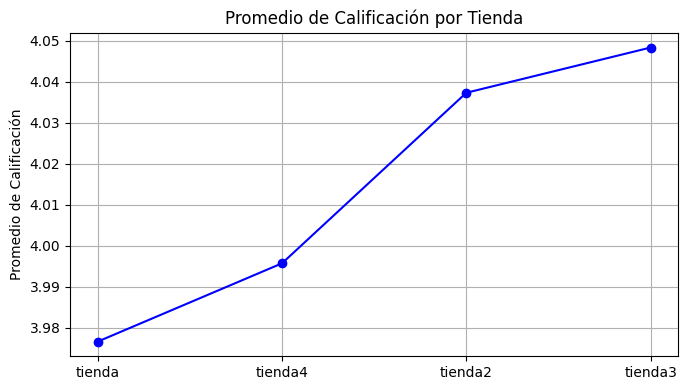

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
nombre = ['tienda','tienda2','tienda3','tienda4']
promedios= []
for x in nombre:
    df = globals()[x]
    df_tienda = df['Calificación'].mean()
    print(f"Calificacion promedio {x} es :{df_tienda}" )
    promedios.append(df_tienda)
df_nuevo = pd.DataFrame({'Tienda':nombre,'Promedio':promedios})
df_nuevo.sort_values(by='Promedio',ascending=True,inplace=True)

# Graficar todos los promedios en un solo gráfico
plt.figure(figsize=(7, 4))
plt.plot(df_nuevo['Tienda'],df_nuevo['Promedio'], marker='o', linestyle='-', color='blue')

plt.title('Promedio de Calificación por Tienda')
#plt.xlabel('Tienda')
plt.ylabel('Promedio de Calificación')
plt.grid(True)
plt.tight_layout()
plt.show()

    

# 4. Productos más y menos vendidos

tienda
  Producto + Vendidos  Ctd Vendidas
0       TV LED UHD 4K            60
1          Microondas            60
2             Armario            60
--------------------------------------------------------------------------------


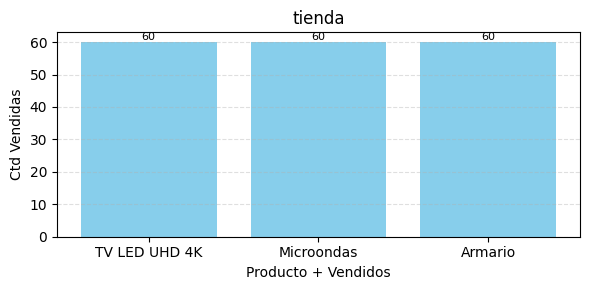

tienda2
         Producto + Vendidos  Ctd Vendidas
0  Iniciando en programación            65
1                 Microondas            62
2                    Batería            61
--------------------------------------------------------------------------------


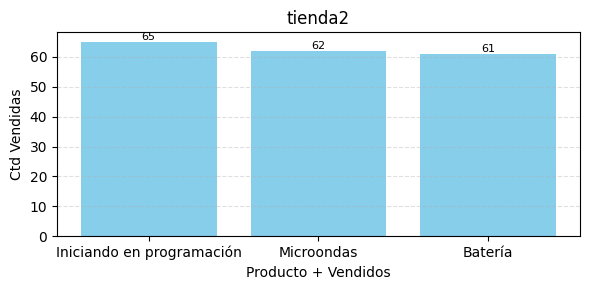

tienda3
  Producto + Vendidos  Ctd Vendidas
0       Kit de bancas            57
1           Cama king            56
2     Mesa de comedor            56
--------------------------------------------------------------------------------


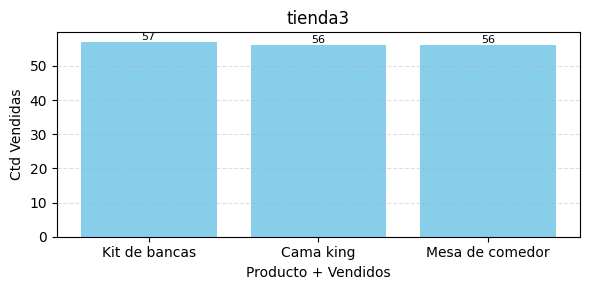

tienda4
       Producto + Vendidos  Ctd Vendidas
0                 Cama box            62
1               Cubertería            59
2  Dashboards con Power BI            56
--------------------------------------------------------------------------------


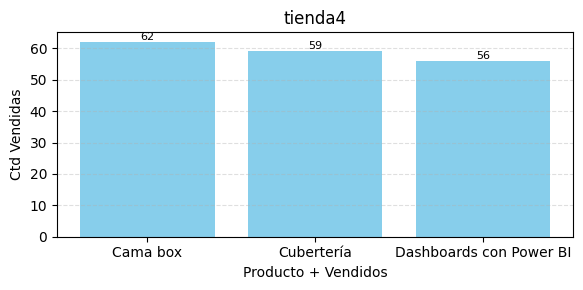

In [ ]:
nombre = ['tienda','tienda2','tienda3','tienda4']
for a in nombre:
    df_tiendas = globals()[a]
    df_productos_top = df_tiendas.groupby(['Producto'])['Producto'].count().rename('Ctd Vendidas').sort_values(ascending = False).head(3).reset_index()
    df_productos_menos_vendido = df_tiendas.groupby(['Producto'])['Producto'].count().rename('Ctd Vendidas').sort_values(ascending=True).head(3).reset_index()
    df_productos_top.rename(columns={'Producto':'Producto + Vendidos'},inplace=True)
    df_productos_menos_vendido.rename(columns={'Producto':'Producto  - Vendidos'},inplace=True)
    #df_prueba = pd.concat([df_productos_top.reset_index(drop=True),df_productos_menos_vendido.reset_index(drop = True)],axis=1)
    print(f'{a}')
    print(df_productos_top)
    print("--"*40)

    import pandas as pd
    import matplotlib.pyplot as plt


    # # Obtener los 5 productos más vendidos
    # top5 = df_prueba

    # Crear gráfico de barras
    plt.figure(figsize=(6,3))
    bars=plt.bar(df_productos_top['Producto + Vendidos'], df_productos_top['Ctd Vendidas'], color='skyblue')
    plt.title(a)
    plt.xlabel('Producto + Vendidos')
    plt.ylabel('Ctd Vendidas')
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)  # Agrega la cuadrícula al eje Y
    plt.tight_layout()
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=8)  # Adjust fontsize as needed
    plt.show()





# 5. Envío promedio por tienda

In [9]:
nombre = ['tienda','tienda2','tienda3','tienda4']
for a in nombre:
    df_tiendas = globals()[a]
    valor = df_tiendas['Costo de envío'].mean()
    print(f"El envio promedio de {a} es:{valor:.2f}")

El envio promedio de tienda es:26018.61
El envio promedio de tienda2 es:25216.24
El envio promedio de tienda3 es:24805.68
El envio promedio de tienda4 es:23459.46


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




# Obtener los 5 productos más vendidos
top5 = df.sort_values(by='quantity', ascending=False).head(5)

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top5['product'], top5['quantity'], color='skyblue')
plt.title('Top 5 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Agrega la cuadrícula al eje Y
plt.tight_layout()
plt.show()


Informe sobre Analisis de Alura Store
Tal como se presento en los datos analizados, las cuatro tiendas del señor Juan de su emprendimiento, de las cuales tienen variedad de productos vendidos, costos asociados, opiniones de clientes y ganancias analizadas. En este analisis se vieron 5 puntos principales que se usarán para tomar decisiones estrategicas, estos son:

Ingreso total por cada tienda
Venta de productos por categoría
Valoración media por tienda
Productos más y menos vendidos
Valor del envío promedio por tienda
En cada punto se vio como cada tienda destaca más que otra, por lo cual analizando esos puntos podemos decidir que tienda debe ser vendida y concentrarse en las otras tres.

Analisis de ingresos totales
En este punto y viendo el gráfico de barras en el primer punto, la tienda que más ha ganado en ventas es la primera, con una ganacia de 1150880400 por el total de productos. En contraposicion tenemos a la cuarta tienda que es la que tiene menos ingresos de todas con solo 1038375700 en total.

Ventas por categorias
Este punto es el más parejo de todos para las tiendas, si bien todos tienen distintas cantidades de productos vendidos, todas cuentan con las mismas 8 categorías:

Muebles
Electrodomésticos
Juguetes
Electrónicos
Instrumentos musicales
Libros
Deportes y Diversión
Artículos para el hogar
En general todas las tiendan tiene valores similares pero si algo tienen en común todas las tiendas es que todas las dos categorias más vendidas son 'Muebles' y 'Electrónicos'

Promedio de la tienda
La calificación dada por los clientes demuestran el nivel de satisfacción por los productos y el servicio otorgado por cada tienda, este nos indica cual tiene mejores resultados en su trato con el público, lo que es un punto positivo para el emprendimiento y puede replicarse en el resto de tiendas.

Si bien todas tienen una calificación promedio bastante cercano uno entre otro, todos rondando cerca de 4, si destacan unos sobre otros, por lo que si tuvieramos que rankear las tiendas de la mejor calificada a la peor seria en el siguiente orden:

Tienda 3
Tienda 2
Tienda 4
Tienda 1
Productos más y menos vendidos
Los productos vendidos son variables entre una tienda y otra, las cantidades y productos más y menos vendidos son diferentes entre una y otra tienda pese a que venden los mismos productos, por lo que es curioso que no sean similares los productos más y menos que se venden entre una tienda y otra, no da una imagen lo suficiente clara para apoyar a la decisión de vender una tienda. Si se llegan a analizar como los productos se venden en relación a la categoría y o analizar todos los productos y cuantos se venden bajo otros analisis.

Promedio costos de envios
Este punto es el último y a su vez uno un poco dificil de ver si no se toma en consideración el punto de analisís de facturación que indica las ganacias, ya que es entendible que mientras más venda una tienda más deba despachar y más gastos tenga para envíos. No es de sorprender que la tienda 1 sea la tienda con más gastos de todas, a su vez la tienda 4 es la que tiene menos gastos asociados con envios. Si bien hay factores a analizar como puntos geograficos de envios, hay otros que faltan para un analisis más produnfo, por lo que teniendo la información que esta a la mano y con las habilidades que se poseen actualmente para analizar los datos pasamos a las conclusiones.

Conclusión
Considerando todos los puntos vistos anteriormente y en una visión de como cada tienda maneja sus ingresos, ganacias, ventas y satisfacción de clientes, se sugiere al señor Juan vender la tienda 4 y usar los recursos disponibles para hacer mejoras que beneficien a las otras tiendas retantes.